# Post-processing auto-07p files 
By S Ganga Prasath - on 18-Nov-2021

In [1]:
import sys
import numpy as np
from pylab import *
from scipy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
# Specific imports
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import csv

## Bifurcation diagram
b.XXX is the file with bifurcation diagram data (XXX is the name used in the run, in etica.auto file) which we import here using Pandas.
We remove the first 16 rows which has information about various constants and solution parameters in the run

In [7]:
bT = pd.read_table("b.mu", skiprows=16, delim_whitespace=True, header=None)
bT = bT.apply(pd.to_numeric, errors='coerce')
bT

0     1    2     3          4         5         6          7         8   \
0      0   NaN  NaN   NaN        NaN       NaN       NaN        NaN       NaN   
1      1   1.0  9.0   1.0   0.000000  0.000000  0.000000   0.000000  0.000000   
2      1   2.0  0.0   0.0   0.100000  0.577350  0.000000   0.000000  1.000000   
3      1   3.0  0.0   0.0   0.978920  0.577350  0.000000   0.000000  1.000000   
4      1   4.0  0.0   0.0   1.203920  0.577350  0.000000   0.000000  1.000000   
...   ..   ...  ...   ...        ...       ...       ...        ...       ...   
1107   7  54.0  0.0   0.0 -78.355720  7.639930  1.348163  11.050326  0.586435   
1108   7  55.0  0.0   0.0 -78.846355  7.735564  1.364687  11.199126  0.577210   
1109   7  56.0  0.0   0.0 -79.337344  7.829376  1.380877  11.345491  0.568106   
1110   7  57.0  0.0   0.0 -79.828669  7.921436  1.396745  11.489513  0.559122   
1111   7  58.0 -4.0  56.0 -79.999967  7.953119  1.402202  11.539170  0.556019   

            9         10        11  12  13  14  
0          NaN       NaN       NaN NaN NaN NaN  
1     0.000000  0.000000  0.000000 NaN NaN NaN  
2     0.000000  1.000000  0.000000 NaN NaN NaN  
3     0.000000  1.000000  0.000000 NaN NaN NaN  
4     0.000000  1.000000  0.000000 NaN NaN NaN  
...        ...       ...       ...  ..  ..  ..  
1107  1.348163  0.586435  0.141028 NaN NaN NaN  
1108  1.364687  0.577210  0.142037 NaN NaN NaN  
1109  1.380877  0.568106  0.143003 NaN NaN NaN  
1110  1.396745  0.559122  0.143927 NaN NaN NaN  
1111  1.402202  0.556019  0.144240 NaN NaN NaN  

[1112 rows x 15 columns]

### Plotting bifurcation diagram

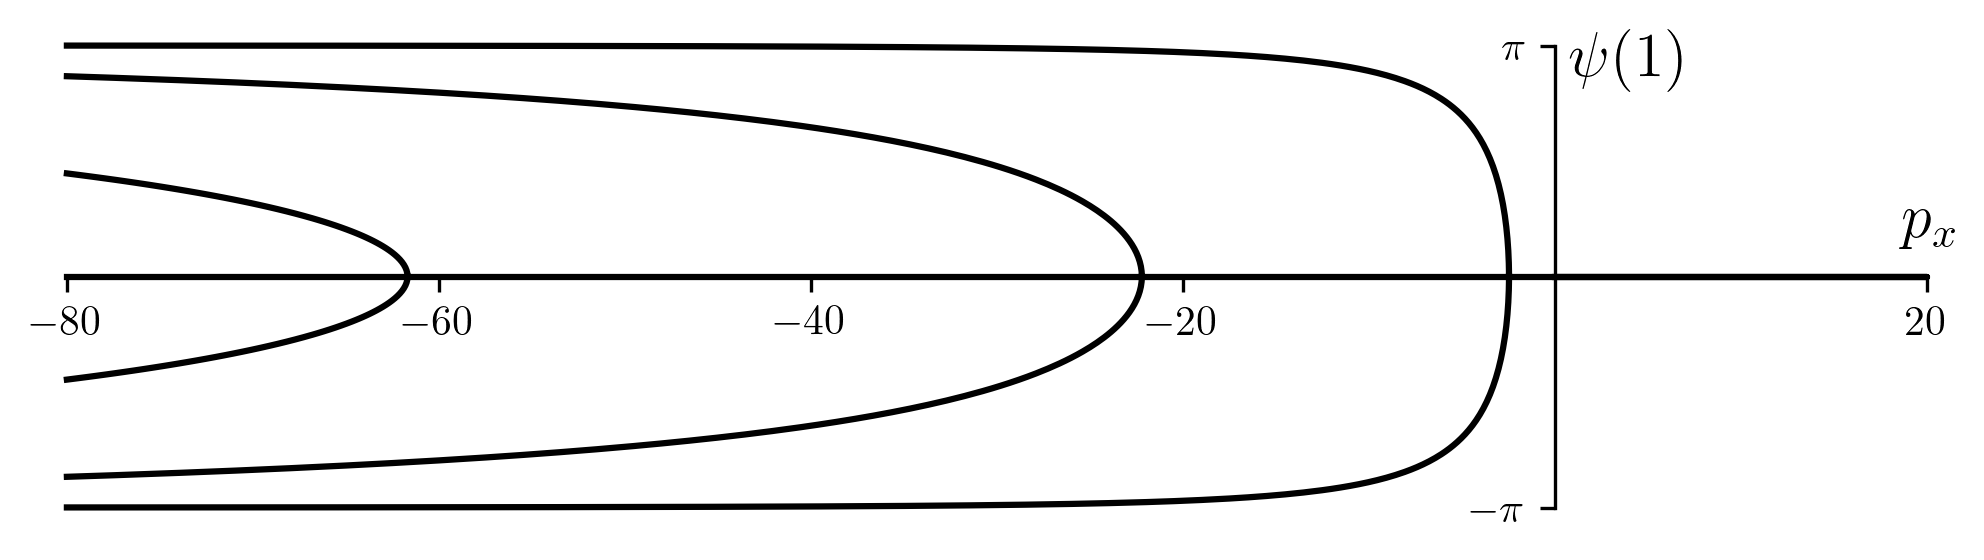

In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="medium")

fig = plt.figure(figsize=(8, 2), dpi=300)
ax = plt.subplot(xlim=[-80, 20], ylim=[-np.pi, np.pi])
plt.rcParams.update({"text.usetex": True})
n = 9
for bInd in np.arange(1,n):
    linewidth = 1.5 if bInd == 1 else 1.5
    linestyle = "-" if bInd == 1 else "-"
    color = "C1" if bInd == 0 else "%.2f" % (0.0)

    ax.plot(bT.loc[bT[0] == bInd][4].tolist(),
            bT.loc[bT[0] == bInd][9].tolist(),
            color=color,
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            )
ax.set_xlabel(r'$p_x$',usetex=True, fontsize=15)
ax.set_ylabel(r'$\psi(1)$',usetex=True,rotation=0, fontsize=15)
ax.set_xticks([-80, -60, -40, -20, 20])
ax.set_yticks([-np.pi, np.pi])
ax.set_yticklabels([r'$-\pi$', '$\pi$'],usetex=True)

ax.xaxis.set_label_coords(1.0,0.68)
ax.yaxis.set_label_coords(0.84,0.9)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_position(("data", 0.0))
ax.spines["bottom"].set_position(("data", 0.0))

plt.show()

# Solution
Solution is available in s.XXX file. The solution is formatted in a specific manner with a list of 12 solution identifiers which describe the parameters for that particular solution before the solution data. These identifiers are described below.

In [4]:
fl = pd.read_table("s.mu", nrows=0, sep="\t", delim_whitespace=True)
lst = list(fl)
con = [float(x) for x in lst]
con = [int(x) for x in con]
ibr = int(con[0]) #the index of the branch
ntot = con[1] #the index of the point
itp = con[2] #the type of point
lab = con[3] #the label of the point
nfpr = con[4] #the number of free parameters used in the computation
isw = con[5] #the value of isw used in the computation
ntpl = con[6] #the number of points in the time interval [0,1]
nar = con[7] #the number of values written per point
nrowpr = con[8] #the number of lines printed following the identifying line
ntst = con[9] #the number of time intervals used in the discretization
ncol = con[10] #the number of collocation points used
nparx = con[11] #the dimension of the array par

### Plotting filament shape by skipping solution identifiers

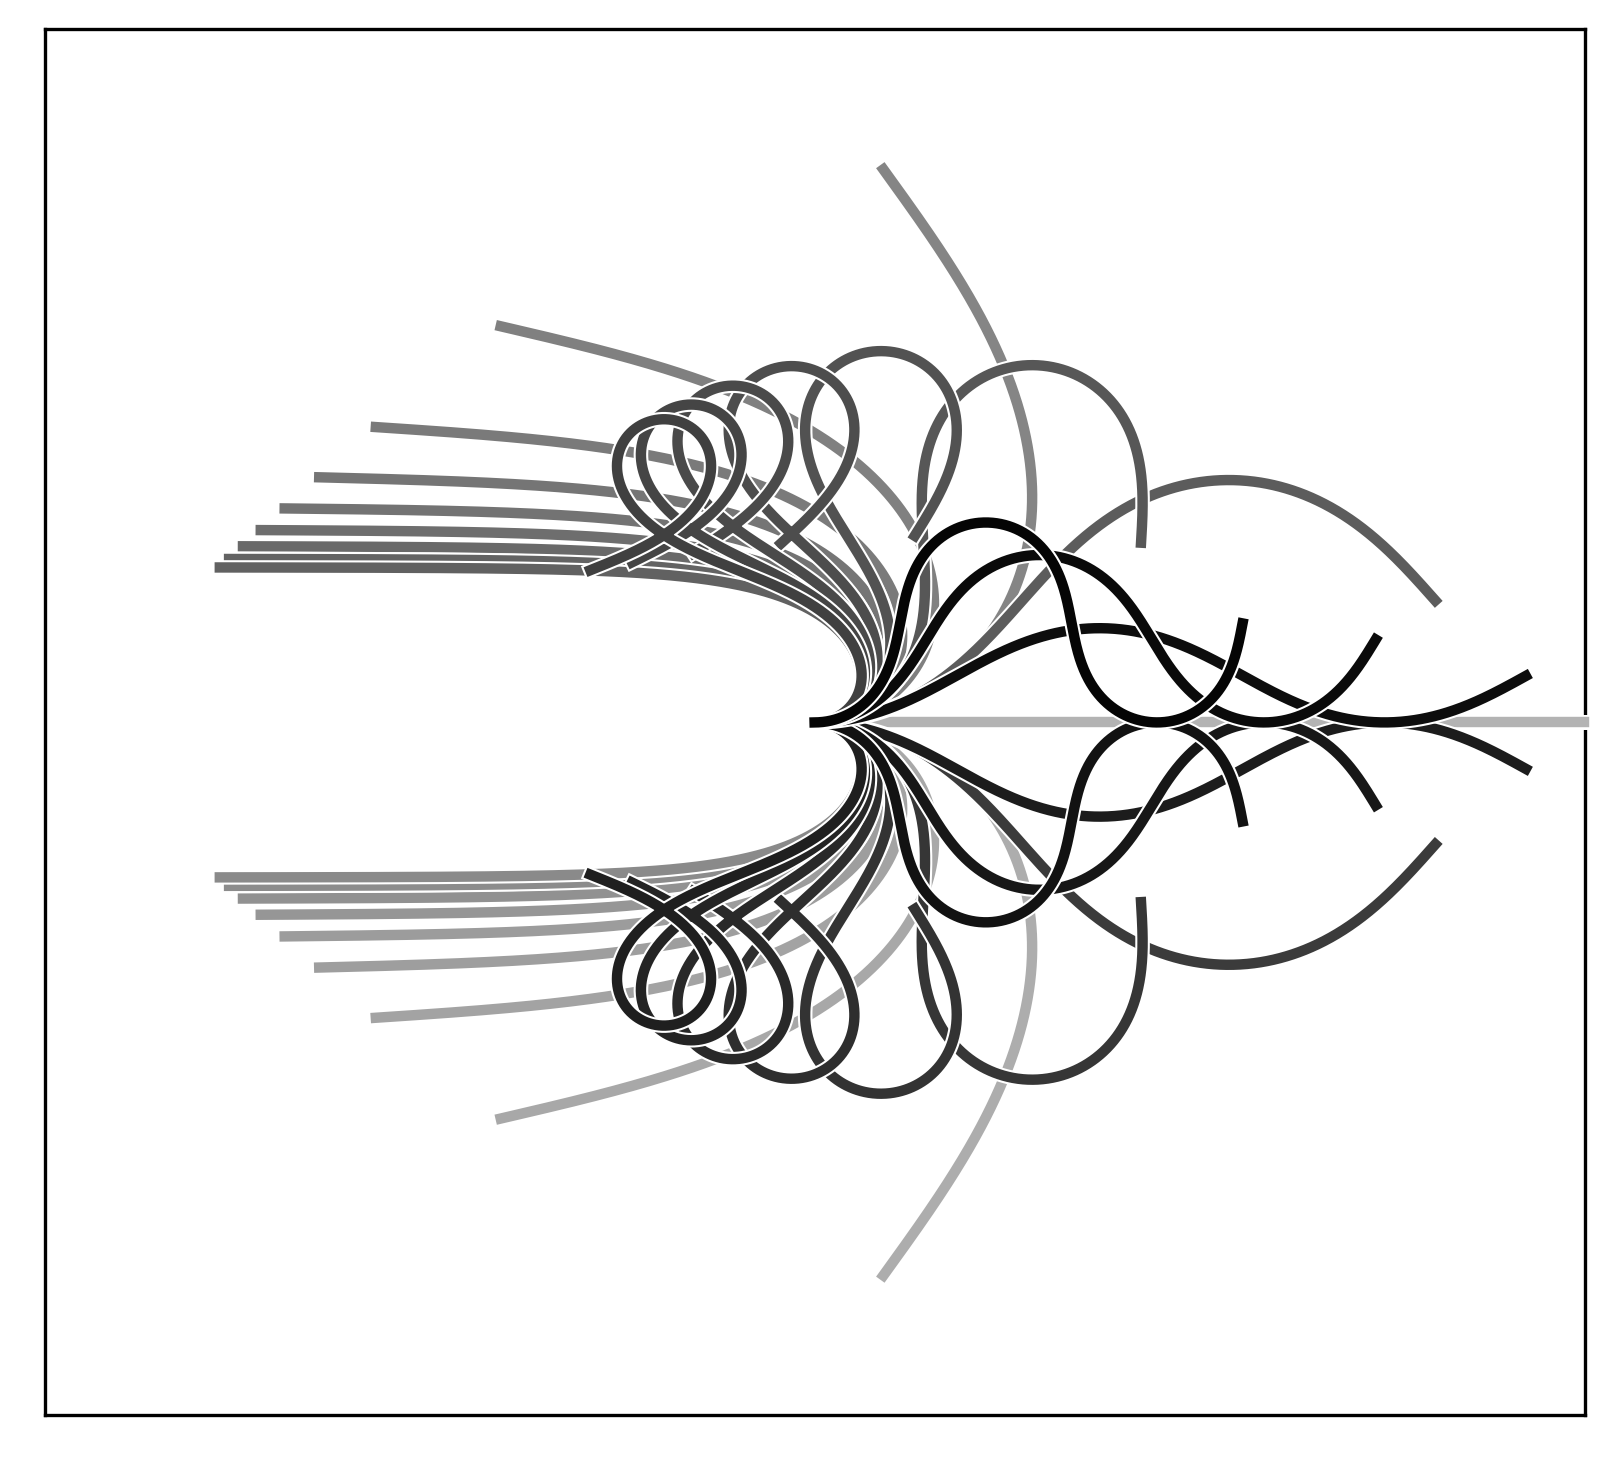

In [5]:
n = 56
fig = plt.figure(figsize=(20,6), dpi=300)
ax = plt.gca(xticks=[], yticks=[]) #you first need to get the axis handle
ax.set_aspect(0.9)
ax.set_xlim([-1.0,1.0])
ax.set_ylim([-1.0,1.0])
for ind in np.arange(n):
    linewidth = 2.5
    linestyle = "-" if ind == 1 else "-"
    color = "C1" if ind == 0 else "%.2f" % ((n-ind)/n)
    df = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl-1, delim_whitespace=True)
    ax.plot(df[3].tolist(), df[4].tolist(), color="white", clip_on=False, zorder=ind, linewidth=3.5)
    ax.plot(df[3].tolist(),
            df[4].tolist(),
            color=color,
            clip_on=False,
            zorder=ind,
            linewidth=linewidth,
            linestyle=linestyle,)
plt.show()

#### Plotting $\psi(s)$ vs $s$

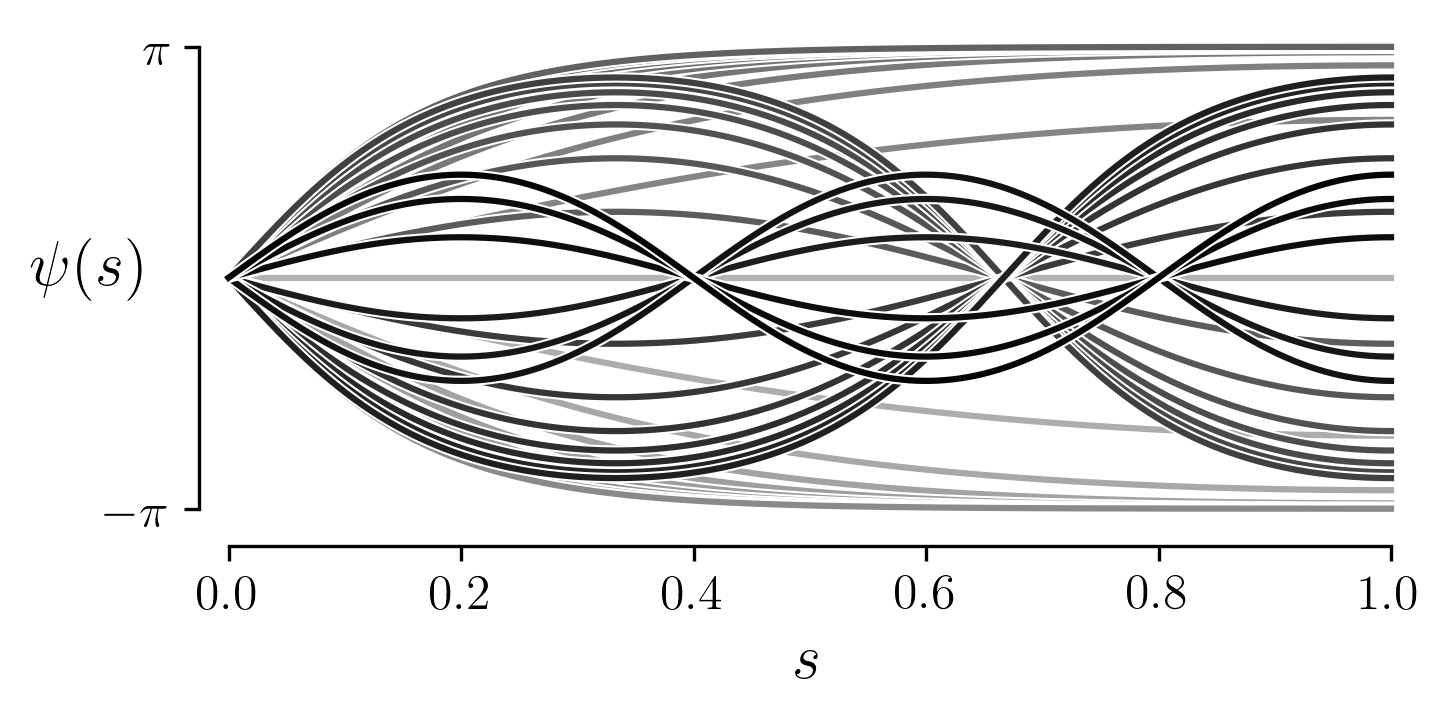

In [331]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
plt.rcParams.update({"text.usetex": True})

n = 56
fig = plt.figure(figsize=(5,2.0), dpi=300)
ax = plt.gca()
ax.set_xlim([0.0,1.0])
ax.set_ylim([-np.pi,np.pi])
for ind in np.arange(n-1,1,-1):
    linewidth = 1.5
    linestyle = "-"
    color = "C1" if ind == 0 else "%.2f" % ((n-ind)/n)
    df = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl, delim_whitespace=True)
    ax.plot(df[0].tolist(), df[1].tolist(), color="white", clip_on=False, zorder=ind, linewidth=2.5)
    ax.plot(df[0].tolist(), df[1].tolist(), color=color, clip_on=False, zorder=ind, linewidth=linewidth,
            linestyle=linestyle)
ax.set_xlabel(r'$s$', usetex=True, fontsize=15)
ax.set_ylabel(r'$\psi(s)$', usetex=True, rotation=0, fontsize=15)
ax.yaxis.set_label_coords(-0.12,0.45)

ax.set_yticks([-np.pi, np.pi])
ax.set_yticklabels([r'$-\pi$', '$\pi$'],usetex=True)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_position(("data", -0.025))
ax.spines["bottom"].set_position(("data", -np.pi-0.5))
ax.axhline(0, color="0.5", linewidth=0.5)
plt.show()